Project – Analyzing the trends of COVID-19 with Python Problem Statement: Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends

Guidelines:

• Use pandas to accumulate data

• Use plotly (visualization library) to create interactive visualizations 

• Use Facebook prophet library to make time series models 

• Visualize the prediction by combining these technologies

In [1]:
# importing all the required files
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pt
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset and also converting the date column from string to date time

df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [4]:
# rewriting Active for better understanding

df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [6]:
# Renaming columns for convienence

df.rename(columns={'Country/Region':'Country'},inplace=True)

In [7]:
# Getting data of last date

w = df[df['Date'] == max(df['Date'])]
w

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
# Sum up the cases country wise

w = w.groupby('Country')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
w

,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,36263,9796,25198,1269
1,Albania,4880,1991,2745,144
2,Algeria,27973,7973,18837,1163
3,Andorra,907,52,803,52
4,Angola,950,667,242,41
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,3752,78
183,Western Sahara,10,1,8,1
184,Yemen,1691,375,833,483
185,Zambia,4552,1597,2815,140


In [9]:
fig = px.choropleth(w,locations='Country',locationmode='country names',color='Active',hover_name='Country',range_color=[1,1500],color_continuous_scale='Peach',title='Active Cases Country')
fig.show()

Model Building

In [10]:
#Installing F-prophet Library

!pip install prophet

In [11]:
#importing the Prophet

from prophet import Prophet

In [12]:
# Sum up all the cofirmed cases date

confirmed_cases = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [13]:

confirmed_cases.columns = ['ds','y']
confirmed_cases['ds']=pd.to_datetime(confirmed_cases['ds'])
confirmed_cases.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [14]:
# model assign and fit 

model = Prophet(interval_width=0.95)
model.fit(confirmed_cases)

12:32:17 - cmdstanpy - INFO - Chain [1] start processing
12:32:17 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Creating the dates for furture predicting

future = model.make_future_dataframe(periods=7,freq='D')
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [16]:
# Predicting the future

predict = model.predict(future)
predict[['ds','yhat']]

,ds,yhat
0,2020-01-22,-2.034240e+04
1,2020-01-23,-7.746625e+03
2,2020-01-24,6.123967e+03
3,2020-01-25,1.237938e+04
4,2020-01-26,8.615766e+03
...,...,...
190,2020-07-30,1.674820e+07
191,2020-07-31,1.696362e+07
192,2020-08-01,1.717143e+07
193,2020-08-02,1.736922e+07


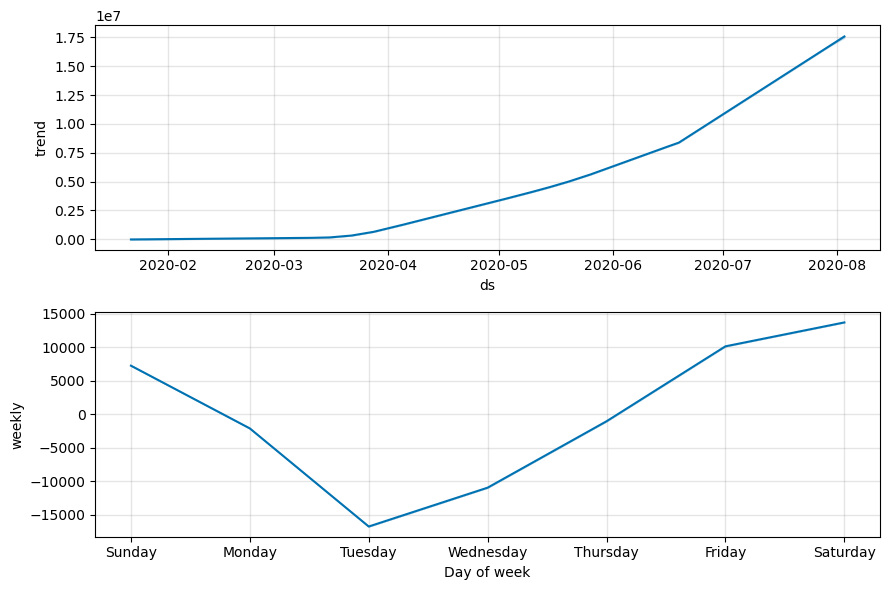

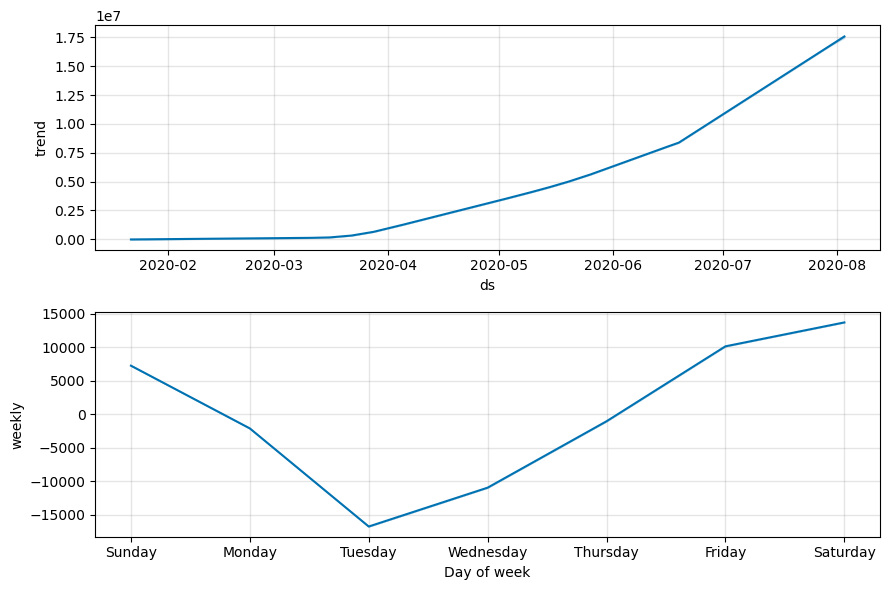

In [17]:
model.plot_components(predict)

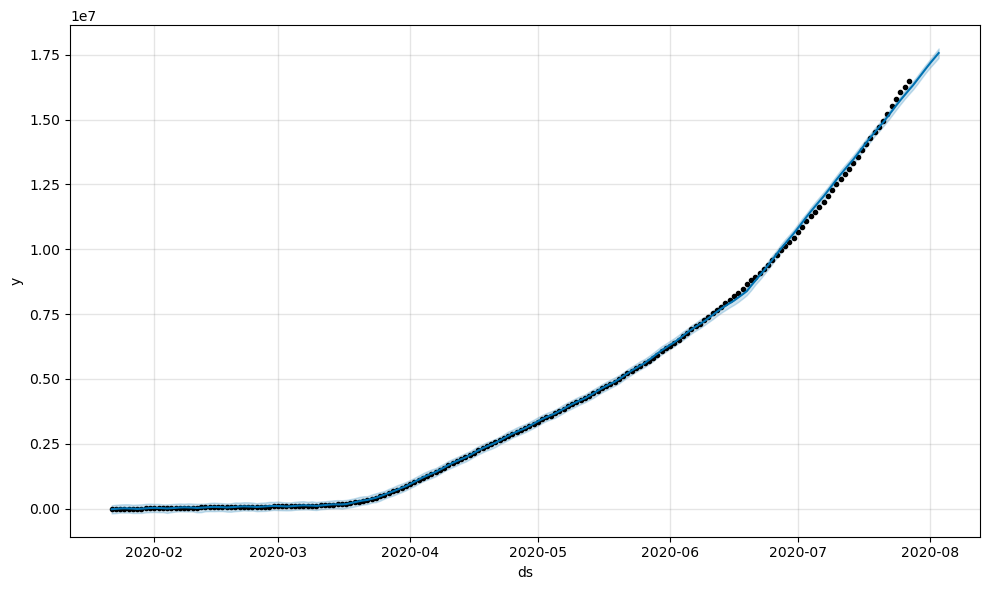

In [18]:
# Plotting the predictions

forecast_plot = model.plot(predict)

Active cases

12:32:18 - cmdstanpy - INFO - Chain [1] start processing
12:32:18 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat
0   2020-01-22 -5.374381e+03
1   2020-01-23 -3.866446e+02
2   2020-01-24  7.183784e+03
3   2020-01-25  8.879234e+03
4   2020-01-26  1.571749e+04
..         ...           ...
190 2020-07-30  6.481007e+06
191 2020-07-31  6.549045e+06
192 2020-08-01  6.611208e+06
193 2020-08-02  6.678514e+06
194 2020-08-03  6.732249e+06

[195 rows x 2 columns]


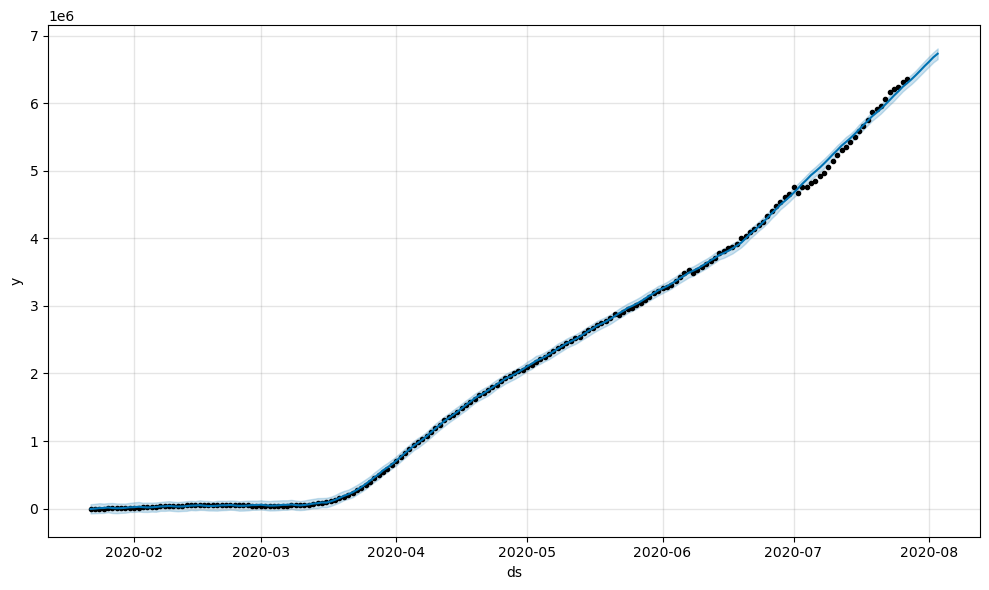

In [19]:
# Model build,predict and plot for active_cases

active_cases = df.groupby('Date')['Active'].sum().reset_index()
active_cases.columns = ['ds','y']
active_cases['ds']=pd.to_datetime(confirmed_cases['ds'])
model = Prophet(interval_width=0.95)
model.fit(active_cases)
future = model.make_future_dataframe(periods=7,freq='D')
predict = model.predict(future)
print(predict[['ds','yhat']])
forecast_plot = model.plot(predict)

Death Cases

12:32:19 - cmdstanpy - INFO - Chain [1] start processing
12:32:19 - cmdstanpy - INFO - Chain [1] done processing


            ds           yhat
0   2020-01-22    -713.145753
1   2020-01-23     -44.144881
2   2020-01-24     531.108934
3   2020-01-25     472.645240
4   2020-01-26    -331.316151
..         ...            ...
190 2020-07-30  663521.743356
191 2020-07-31  669038.962960
192 2020-08-01  673922.465056
193 2020-08-02  678060.469456
194 2020-08-03  682351.854619

[195 rows x 2 columns]


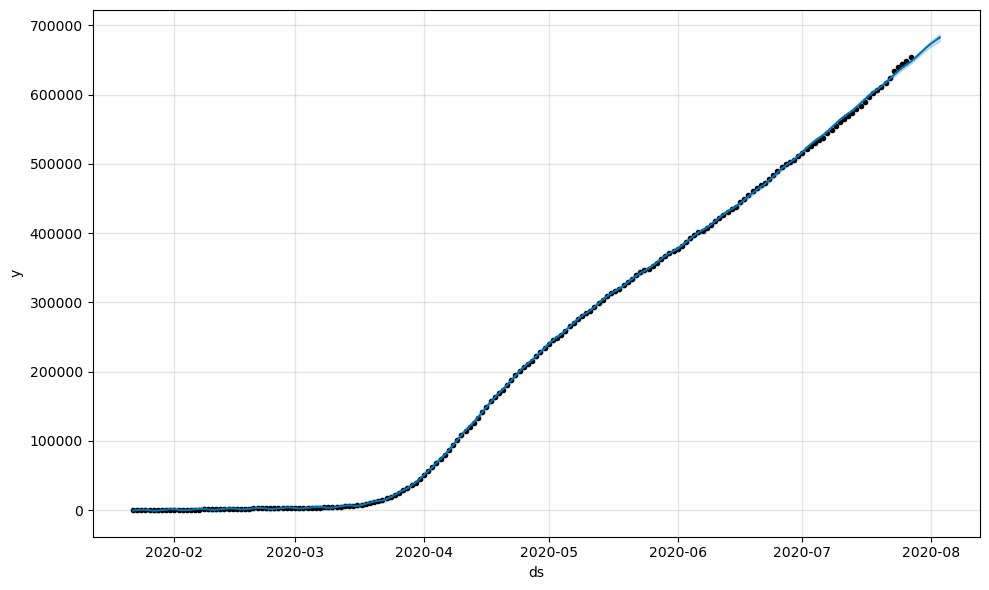

In [20]:
# Model build,predict and plot for  death_cases

death_cases = df.groupby('Date')['Deaths'].sum().reset_index()
death_cases.columns = ['ds','y']
death_cases['ds'] = pd.to_datetime(death_cases['ds'])
model = Prophet(interval_width=0.95)
model.fit(death_cases)
future = model.make_future_dataframe(periods=7,freq='D')
predict = model.predict(future)
print(predict[['ds','yhat']])
forecast_plot = model.plot(predict)


Recovered  Cases

12:32:19 - cmdstanpy - INFO - Chain [1] start processing
12:32:19 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat
0   2020-01-22 -1.689772e+04
1   2020-01-23 -9.717577e+03
2   2020-01-24 -3.787700e+03
3   2020-01-25  8.777771e+02
4   2020-01-26 -8.687512e+03
..         ...           ...
190 2020-07-30  9.598531e+06
191 2020-07-31  9.740095e+06
192 2020-08-01  9.880394e+06
193 2020-08-02  1.000646e+07
194 2020-08-03  1.014305e+07

[195 rows x 2 columns]


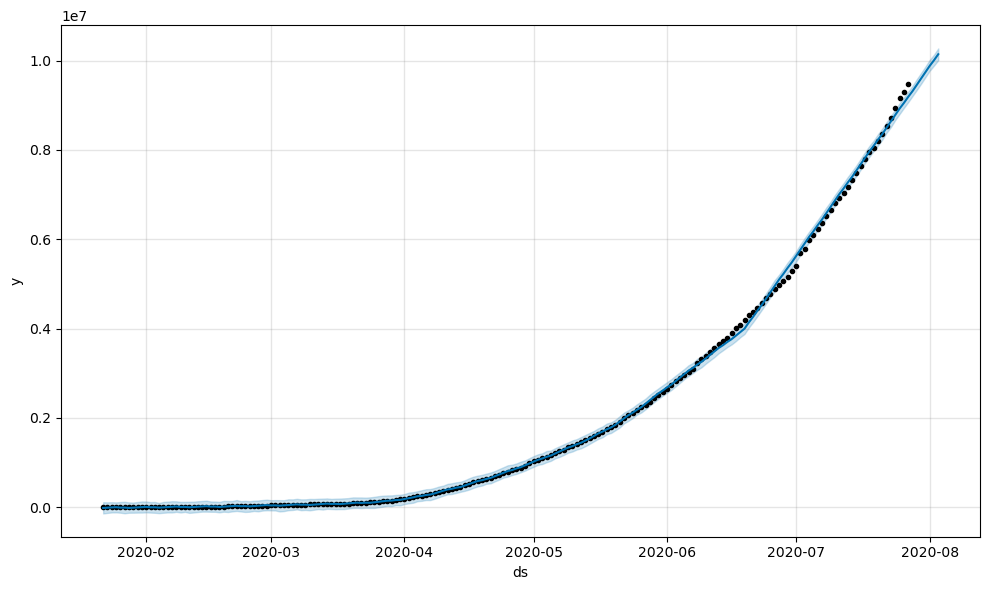

In [21]:
# Model build,predict and plot for recovered_cases

recovered_cases = df.groupby('Date')['Recovered'].sum().reset_index()
recovered_cases.columns = ['ds','y']
recovered_cases['ds'] = pd.to_datetime(recovered_cases['ds'])
model = Prophet(interval_width=0.95)
model.fit(recovered_cases)
future = model.make_future_dataframe(freq='D',periods=7)
predict = model.predict(future)
print(predict[['ds','yhat']])
forecast_model = model.plot(predict)